# Analysis of 3-D Scans

### We have the middle segment from the 421 + 144 TCIA lung cancer samples formatted for analysis of Cubical Complexes

In [2]:
import numpy as np
import matplotlib.pylab as plt
import math
import os
import gudhi as gd
import pandas as pd
import PersistenceImages.persistence_images as pimg

## Functions and Persimager setup

In [3]:
pers_imager = pimg.PersistenceImager()
pers_imager.pixel_size = 0.05
pers_imager.birth_range = (0,1)
pers_imager.pers_range = (0,1)
pers_imager.kernel_params['sigma'][0] = [0.01, 0]
pers_imager.kernel_params['sigma'][1] = [0, 0.01]

print(pers_imager.kernel_params['sigma'][0])
print(pers_imager)

[0.01 0.  ]
PersistenceImager object: 
  pixel size: 0.05 
  resolution: (20, 20) 
  birth range: (0, 1) 
  persistence range: (0, 1) 
  weight: linear_ramp 
  kernel: bvncdf 
  weight parameters: {} 
  kernel parameters: {sigma: [[0.01 0.  ]
 [0.   0.01]]}


In [4]:
def BitmapToImageVector(bitmap, imager):
    l,w,h = np.shape(bitmap)
    
    cubical = gd.CubicalComplex(dimensions = [l,w,h], top_dimensional_cells = bitmap.flatten())
    phom = cubical.compute_persistence()
    phom_0 = cubical.persistence_intervals_in_dimension(0)
    phom_1 = cubical.persistence_intervals_in_dimension(1)
    phom_2 = cubical.persistence_intervals_in_dimension(2)
    
    pers_img_0 = imager.transform(phom_0, skew=True)
    pers_img_1 = imager.transform(phom_1, skew=True)
    pers_img_2 = imager.transform(phom_2, skew=True)
    
    pers_img_0 = np.resize(pers_img_0, (1, len(pers_img_0)**2))
    pers_img_1 = np.resize(pers_img_1, (1, len(pers_img_1)**2))
    pers_img_1 = np.resize(pers_img_2, (1, len(pers_img_2)**2))

    #ImageVector = np.concatenate((pers_img_0[0], pers_img_1[0]), axis=0)
    
    return(pers_img_0, pers_img_1, pers_img_2)

In [5]:
def HomToImageVector(phom, imager)

SyntaxError: invalid syntax (<ipython-input-5-99de1609c847>, line 1)

## Example file

In [6]:
#Load in an example file
lung_test = np.load('./python_hom_v2/LUNG1-001.npy.csv')

ValueError: Cannot load file containing pickled data when allow_pickle=False

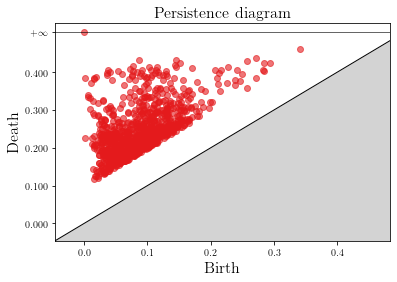

In [4]:
img_0, img_1, img_2 = HomToImageVector(lung_test, pers_imager)


gd.plot_persistence_diagram(hom_0)

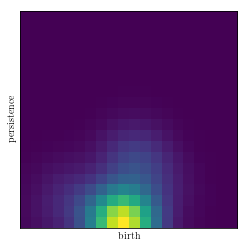

In [5]:
pers_imager.plot_image(hom_2, skew = True)

## Read in segmentations and compute persistent homology

In [14]:
#Radiomics Scans
directory = os.fsencode('./Radiomics_Arrays')

all_rad_scans = []
maxes = []
mins = []

for file in os.listdir(directory):
    filename = './Radiomics_Arrays/' + os.fsdecode(file)
    lung = np.load(filename)
    all_rad_scans.append(lung)
    
rad_phom_0s = []
rad_phom_1s = []
rad_phom_2s = []
rad_pimg_0s = []
rad_pimg_1s = []
rad_pimg_2s = []
rad_concatenated_images = []

for tumor in all_rad_scans:
    rad_phom_0, rad_phom_1, rad_phom_2, rad_pimg_0, rad_pimg_1, rad_pimg_2 = BitmapToImageVector(tumor, pers_imager)
    
    rad_phom_0s.append(rad_phom_0)
    rad_phom_1s.append(rad_phom_1)
    rad_phom_2s.append(rad_phom_2)
    rad_pimg_0s.append(rad_pimg_1)
    rad_pimg_1s.append(rad_pimg_0)
    rad_pimg_2s.append(rad_pimg_2)
    
    
    imgs = np.concatenate((rad_pimg_0[0], rad_pimg_1[0], rad_pimg_2[0]), axis=0)
    rad_concatenated_images.append(imgs)

rad_concatenated_images = np.array(rad_concatenated_images)

IndexError: too many indices for array

In [65]:
#Radiogenomics Scans
directory = os.fsencode('./Radiogenomics_Arrays')

all_radg_scans = []
maxes = []
mins = []

for file in os.listdir(directory):
    filename = './Radiogenomics_Arrays/' + os.fsdecode(file)
    lung = np.load(filename)
    all_rad_scans.append(lung)
    
radg_phom_0s = []
radg_phom_1s = []
radg_phom_2s = []
radg_pimg_0s = []
radg_pimg_1s = []
radg_pimg_2s = []
radg_concatenated_images = []

for tumor in all_rad_scans:
    radg_phom_0, radg_phom_1, radg_phom_2, radg_pimg_0, radg_pimg_1, radg_pimg_2 = BitmapToImageVector(tumor, pers_imager)
    
    radg_phom_0s.append(radg_phom_0)
    radg_phom_1s.append(radg_phom_1)
    radg_phom_2s.append(radg_phom_2)
    radg_pimg_0s.append(radg_pimg_1)
    radg_pimg_1s.append(radg_pimg_0)
    radg_pimg_2s.append(radg_pimg_2)
    
    
    imgs = np.concatenate((radg_pimg_0[0], radg_pimg_1[0], radg_pimg_2[0]), axis=0)
    radg_concatenated_images.append(imgs)

radg_concatenated_images = np.array(radg_concatenated_images)

## Read in clinical data

In [66]:
#Radiomics clinical data
rad_clinical = pd.read_csv("rad_clinic.csv")
rad_clinical = rad_clinical.drop(rad_clinical.index[127]) #Tumor 128 has no segmentation

#Radiogenomics clinical data
radg_clinical = pd.read_csv("radg_clinic.csv", skiprows = range(1,50))
radg_clinical = radg_clinical[0:146]
radg_clinical = radg_clinical.drop(radg_clinical.index[[8, 142]]) #9 and 143 have no segmentation

In [67]:
radg_clinical["Histology"] = radg_clinical['Histology'].str.lower()
rad_histology = rad_clinical.Histology
radg_histology = radg_clinical.Histology
print(rad_histology)
print(radg_histology)

0                   large cell
1      squamous cell carcinoma
2                   large cell
3      squamous cell carcinoma
4      squamous cell carcinoma
                ...           
417             adenocarcinoma
418    squamous cell carcinoma
419    squamous cell carcinoma
420    squamous cell carcinoma
421                        NaN
Name: Histology, Length: 421, dtype: object
0               adenocarcinoma
1               adenocarcinoma
2               adenocarcinoma
3      squamous cell carcinoma
4               adenocarcinoma
                ...           
140             adenocarcinoma
141             adenocarcinoma
143             adenocarcinoma
144             adenocarcinoma
145             adenocarcinoma
Name: Histology, Length: 144, dtype: object


In [68]:
print(sum(radg_histology == 'adenocarcinoma'))
print(sum(radg_histology == 'squamous cell carcinoma'))

print(sum(rad_histology == "adenocarcinoma"))
print(sum(rad_histology == 'squamous cell carcinoma'))

112
29
51
152


### Combine rad and radg datasets

In [69]:
radg_adeno = radg_histology == 'adenocarcinoma'
radg_squamous = radg_histology == 'squamous cell carcinoma'
rad_adeno = rad_histology == 'adenocarcinoma'
rad_squamous = rad_histology == 'squamous cell carcinoma'

print(sum(radg_adeno | radg_squamous))
print(sum(rad_adeno | rad_squamous))

141
203


In [103]:
radg_histology_adsq = np.array(radg_histology[radg_adeno | radg_squamous])
rad_histology_adsq = np.array(rad_histology[rad_adeno | rad_squamous])


radg_concatenated_images_adsq = radg_concatenated_images[radg_adeno | radg_squamous]
rad_concatenated_images_adsq = rad_concatenated_images[rad_adeno | rad_squamous]


histology_adsq = np.array(list(radg_histology_adsq) + list(rad_histology_adsq))
images_adsq = np.array(list(radg_concatenated_images_adsq) + list(rad_concatenated_images_adsq))

# Do Machine Learning

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

### Radiogenomics Dataset

In [104]:
scores = []
clf_xgboost = XGBClassifier()
cv = KFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in cv.split(radg_concatenated_images_adsq):

    X_train, X_test = radg_concatenated_images_adsq[train_index], radg_concatenated_images_adsq[test_index]
    y_train, y_test = radg_histology_adsq[train_index], radg_histology_adsq[test_index]
    clf_xgboost.fit(X_train, y_train)
    scores.append(clf_xgboost.score(X_test, y_test))
    
print("Average Test Accuracy: %.2f%%" % (np.mean(scores) * 100.0))

Average Test Accuracy: 73.03%


### Radiomics Dataset

In [105]:
scores = []
clf_xgboost = XGBClassifier()
cv = KFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in cv.split(rad_concatenated_images_adsq):

    X_train, X_test = rad_concatenated_images_adsq[train_index], rad_concatenated_images_adsq[test_index]
    y_train, y_test = rad_histology_adsq[train_index], rad_histology_adsq[test_index]
    clf_xgboost.fit(X_train, y_train)
    scores.append(clf_xgboost.score(X_test, y_test))
    
print("Average Test Accuracy: %.2f%%" % (np.mean(scores) * 100.0))

Average Test Accuracy: 65.54%


### Combined Dataset

In [106]:
scores = []
clf_xgboost = XGBClassifier()
cv = KFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in cv.split(images_adsq):

    X_train, X_test = images_adsq[train_index], images_adsq[test_index]
    y_train, y_test = histology_adsq[train_index], histology_adsq[test_index]
    clf_xgboost.fit(X_train, y_train)
    scores.append(clf_xgboost.score(X_test, y_test))
    
print("Average Test Accuracy: %.2f%%" % (np.mean(scores) * 100.0))

Average Test Accuracy: 57.85%
